___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# AutoEncoders for Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [4]:
X,y = data
display(y)

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [5]:
# Just add some noise to the data
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [7]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


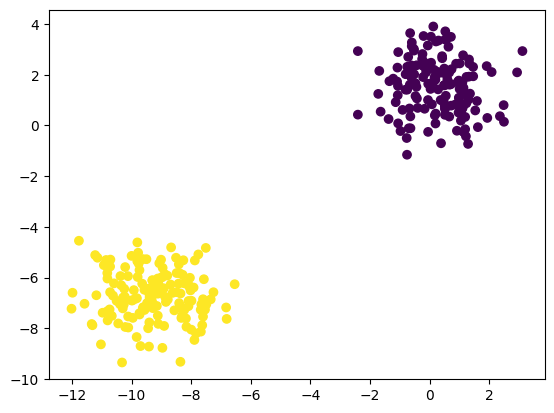

In [8]:
plt.scatter(feat['X1'],feat['X2'],c=y)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# %matplotlib notebook

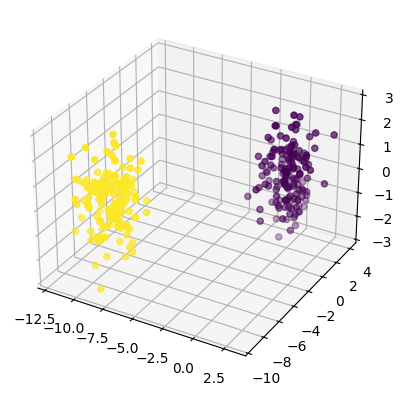

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder and Decoder

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD  # Stochastic Gradient Descend

2025-04-23 16:07:11.011442: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-23 16:07:11.026327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745417231.041244  405336 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745417231.045098  405336 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 16:07:11.062089: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [13]:
# Autoencoder: 3 --> 2 --> 3

In [14]:
# 3 --> 2 (Original)
# encoder = Sequential()
# # encoder.add(InputLayer(shape=[3]))
# encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745415483.266360  397239 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
encoder = Sequential()
encoder.add(Input(shape=(3,)))
encoder.add(Dense(units=2,activation='relu'))
encoder.summary()

I0000 00:00:1745417372.007385  405336 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 2 ---> 3 (Oringinal)
# decoder = Sequential()
# decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [16]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Input(shape=(2,)))
decoder.add(Dense(units=3,activation='relu'))
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [20]:
# scaled_data
scaled_data

array([[2.07475524e-01, 1.95571963e-01, 9.85845750e-01],
       [8.35929679e-01, 9.39652004e-01, 6.09403243e-01],
       [7.78344698e-01, 9.18055791e-01, 6.60079904e-01],
       [2.76123683e-01, 8.64187747e-02, 5.86892040e-01],
       [6.89943218e-02, 1.48018660e-01, 6.13565724e-01],
       [7.93328662e-02, 2.66181866e-01, 4.37825912e-01],
       [8.58345111e-01, 7.43675286e-01, 3.42071017e-01],
       [1.13649812e-01, 1.61015757e-01, 6.05388874e-01],
       [7.97071012e-01, 9.69575837e-01, 1.30174900e-01],
       [8.04420781e-01, 8.70758874e-01, 6.29683804e-01],
       [1.45851346e-01, 3.01543367e-01, 5.91417162e-01],
       [5.50858487e-02, 2.00066208e-01, 3.88988121e-01],
       [8.28535567e-01, 9.61146391e-01, 5.29823913e-01],
       [2.59466086e-01, 1.83035970e-01, 3.58225464e-01],
       [8.67698238e-01, 7.58466630e-01, 3.26649038e-01],
       [2.98886547e-01, 1.72814182e-01, 6.68607073e-01],
       [7.44511367e-01, 8.79978328e-01, 5.30204031e-01],
       [8.41866546e-01, 8.28631

In [21]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5


I0000 00:00:1745417390.145480  406128 service.cc:148] XLA service 0x7fdb74016820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745417390.145530  406128 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A3000 Laptop GPU, Compute Capability 8.6
2025-04-23 16:09:50.172587: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745417390.226419  406128 cuda_dnn.cc:529] Loaded cuDNN version 90300


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1874
Epoch 2/5


I0000 00:00:1745417390.728196  406128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1514 
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0929 
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 


In [22]:
# Only the encoder
encoded_2dim = encoder.predict(scaled_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [23]:
print(encoded_2dim.shape)
encoded_2dim

(300, 2)


array([[7.45984674e-01, 9.97685671e-01],
       [5.09082735e-01, 0.00000000e+00],
       [5.12598515e-01, 0.00000000e+00],
       [5.48640966e-01, 8.03866029e-01],
       [3.34965885e-01, 9.18370247e-01],
       [1.15792081e-01, 7.27614880e-01],
       [4.38683927e-01, 0.00000000e+00],
       [3.61031890e-01, 8.73480797e-01],
       [4.83228415e-02, 0.00000000e+00],
       [5.43729842e-01, 0.00000000e+00],
       [2.83402085e-01, 7.42542922e-01],
       [9.70905870e-02, 7.64352500e-01],
       [4.20396209e-01, 0.00000000e+00],
       [2.74288595e-01, 6.17502809e-01],
       [4.24341977e-01, 0.00000000e+00],
       [5.79804122e-01, 7.72116661e-01],
       [3.97455752e-01, 0.00000000e+00],
       [7.96653032e-01, 2.96759009e-02],
       [8.09085429e-01, 1.75631523e-01],
       [7.21665382e-01, 0.00000000e+00],
       [2.68485725e-01, 8.30390394e-01],
       [6.26198769e-01, 0.00000000e+00],
       [1.33204803e-01, 0.00000000e+00],
       [1.97018906e-01, 6.72068655e-01],
       [2.152764

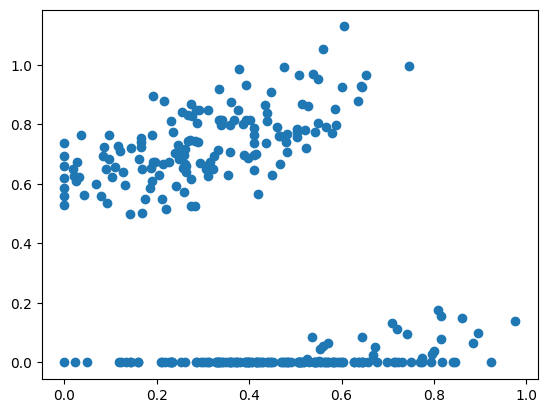

In [24]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1])

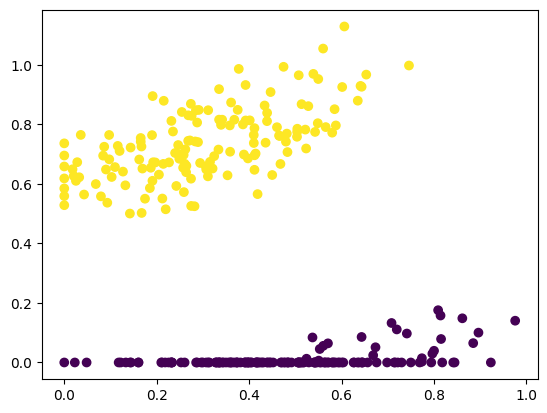

In [25]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)